In [3]:
## Importamos el CSV y las librerias que utilizaremos.

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
from sklearn.svm import SVR

Data = pd.read_csv('C:/Users/USUARIO/Downloads/Airplane_Crashes_and_Fatalities_Since_1908.csv')



ModuleNotFoundError: No module named 'seaborn'

In [2]:
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2838,08/25/1975,20:42,"Minford, Ohio",Portsmouth Aviation - Air Taxi,NaN,"Monticello, NY - Portsmoutn, OH",Piper PA-28,N44323,NaN,4.0,2.0,0.0,The aircraft suffered engine failure on final....
1515,12/31/1957,NaN,"Buenos Aires, Argentina",Aerolineas Argentinas,NaN,Buenos Aires - Rosario - Corrientes,Short Sunderland,LV-AAR,NaN,51.0,9.0,0.0,The flying boat sank in Buenos Aires harbor wh...
1937,10/02/1964,NaN,"Addis Ababa, Ethiopia",Interocean,NaN,"Dublin, Ireland - Addis Ababa",Lockheed L-749A-79 Constellation,LX-IOK,2562,7.0,1.0,0.0,The cargo plane left the runway and crashed wh...
983,01/02/1949,22:05,"Seattle, Washington",Seattle Air Charter,NaN,Seattle - New Haven,Douglas DC-3 (C-47A-DL),NC79025,10181,30.0,14.0,0.0,The aircraft took off in fog with a group of Y...
697,02/15/1945,NaN,"Lagoa Santa, Brazil",Navegacao Aerea Brasileira,NaN,NaN,Lockheed 18 Loadstar,PP-NAE,2149,11.0,11.0,0.0,NaN


In [3]:
## Limpieza

Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00') # Cambiamos 114:20 por 00:00 pues no sabemos si se refiere a 11h o 14h

Data['Time'] = Data['Date'] + ' ' + Data['Time'] # Unimos dos filas.
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) # Convertimos a data type
print('La fecha va de ' + str(Data.Time.min()) + ' a ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() # Solo para evitar duplicados como 'British Airlines' y 'BRITISH Airlines'


La fecha va de 1908-09-17 17:18:00 a 2009-06-08 00:00:00


C:\Users\mfran\AppData\Local\Temp\ipykernel_7012\980970232.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  Data['Time'] = Data['Time'].str.replace('18.40', '18:40')


In [4]:
Data.sample(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2268,11/25/1968,1968-11-25 00:00:00,"Savannakhet, Laos",AIR AMERICA,NaN,NaN,Curtiss C-46D-20-CU,N1386N,22265,28.0,26.0,0.0,Crashed shortly after taking off.
586,07/20/1942,1942-07-20 00:00:00,"Llanfair, England",MILITARY - ROYAL AIR FORCE,NaN,NaN,Lockheed Hudson,N7253,NaN,13.0,13.0,0.0,NaN
367,08/15/1935,1935-08-15 20:18:00,"Walakpa, near Point Barrow, Alaska",PRIVATE,NaN,NaN,Lockheed Orion 9E Explorer float plane,NR12283,195,2.0,2.0,0.0,Dense fog caused the pilot to make a forced la...
1515,12/31/1957,1957-12-31 00:00:00,"Buenos Aires, Argentina",AEROLINEAS ARGENTINAS,NaN,Buenos Aires - Rosario - Corrientes,Short Sunderland,LV-AAR,NaN,51.0,9.0,0.0,The flying boat sank in Buenos Aires harbor wh...
515,04/03/1939,1939-04-03 00:00:00,"Near Marrakech, Morocco",AIR FRANCE,NaN,NaN,Caudron C.635 Simoun,F-AOOT,7372,9.0,9.0,0.0,Crashed into a mountain.
4886,09/13/2002,2002-09-13 13:41:00,"Pucallpa, Peru",AERO PANTANAL - AIR TAXI,NaN,NaN,Cessna U206G,OB-1226,CU20606136,6.0,6.0,0.0,"Shortly after taking off, the pilot radioed a ..."
1111,02/03/1951,1951-02-03 00:00:00,"Near Mt. Cameroun, Buea, Nigeria",AIR FRANCE,NaN,Douala - Niamey,Douglas DC-4,F-BBDO,42992,29.0,29.0,0.0,"Crashed into a mountain at 8,500 feet. Navigat..."
1495,08/20/1957,1957-08-20 00:00:00,"Assam, India",INDAMER,NaN,NaN,Douglas DC-3,VT-ARH,04851,8.0,8.0,0.0,While making a sharp turn the cargo plane stal...
3026,12/22/1977,1977-12-22 12:42:00,"Giddings, Texas",AVIATION CHARTER - AIR TAXI,NaN,"Houston, TX - Austin, TX",Piper PA-28R,N116MM,NaN,2.0,2.0,0.0,Exceeded design stress limits of aircraft afte...
348,03/07/1935,1935-03-07 00:00:00,"Schievelbein, Germany",DERULUFT,NaN,NaN,Rochrbach Roland,D-AJYP,45,NaN,3.0,0.0,Fuselage failure.


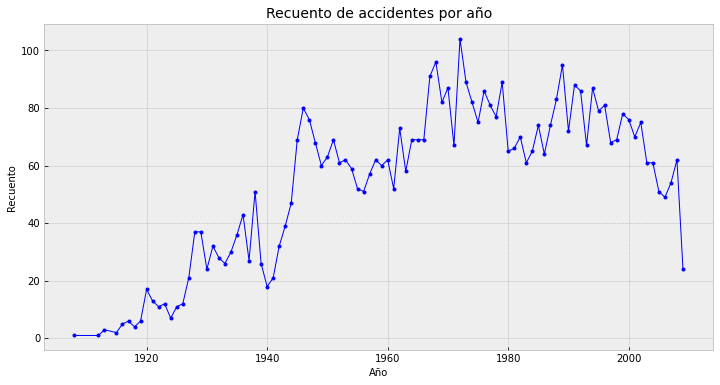

In [5]:
## Accidentes por año

Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() # Temp va a ser un dataframe temporal 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Recuento', fontsize=10)
plt.title('Recuento de accidentes por año', loc='Center', fontsize=14)
plt.show()

C:\Users\mfran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mfran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mfran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


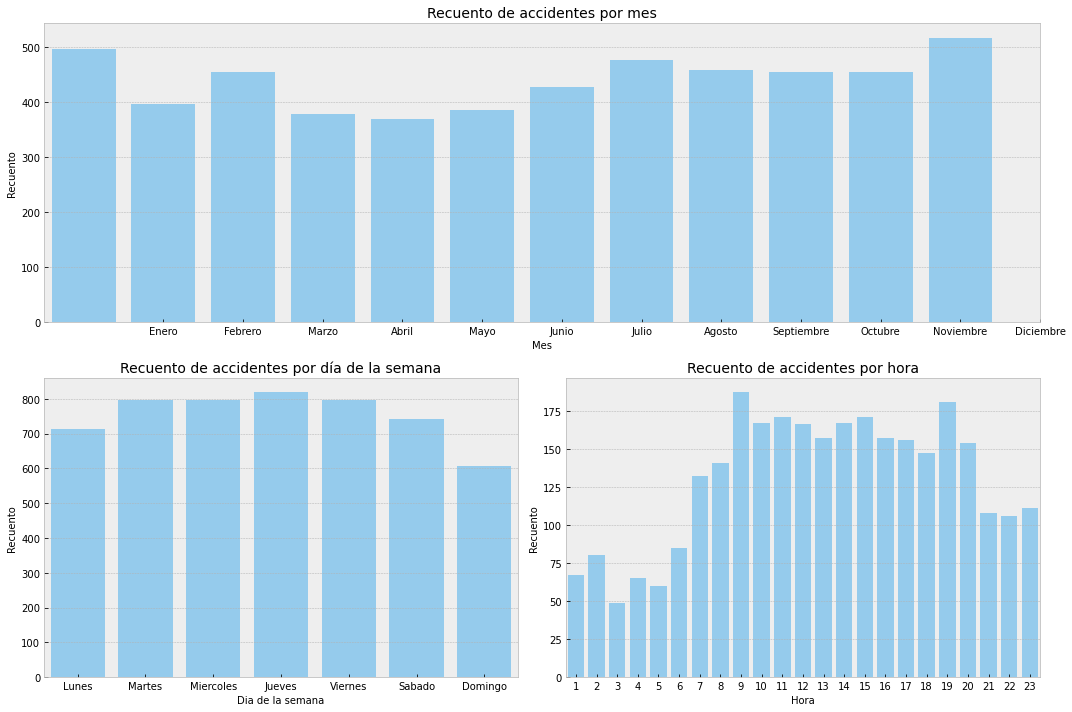

In [6]:
## Accidentes por mes, semana y hora


import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(Data.groupby(Data.Time.dt.month)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.month)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index, ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.xlabel('Mes', fontsize=10)
plt.ylabel('Recuento', fontsize=10)
plt.title('Recuento de accidentes por mes', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])
plt.xlabel('Dia de la semana', fontsize=10)
plt.ylabel('Recuento', fontsize=10)
plt.title('Recuento de accidentes por día de la semana', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count().index, 'Date', data=Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hora', fontsize=10)
plt.ylabel('Recuento', fontsize=10)
plt.title('Recuento de accidentes por hora', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

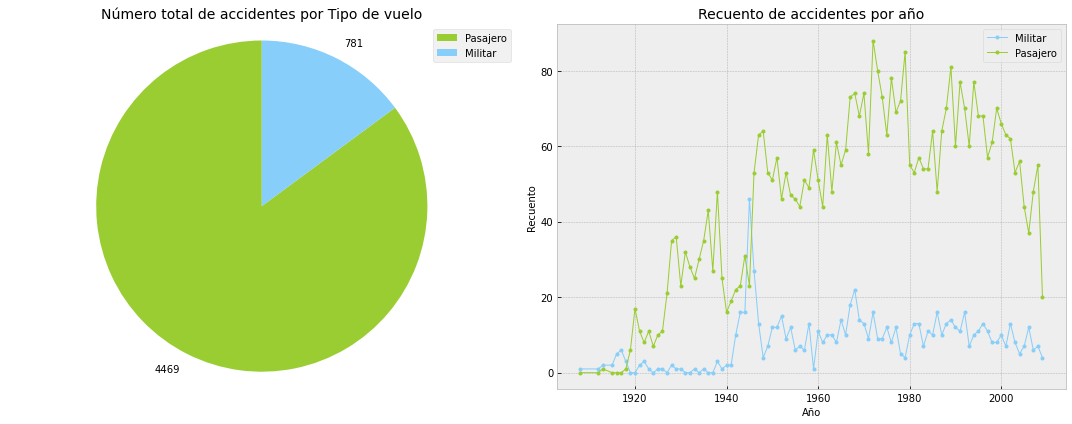

In [7]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Pasajero', 'Militar']

Temp2 = Data.copy()
Temp2['Militar'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Pasajero'] = Temp2.Militar == False
Temp2 = Temp2.loc[:, ['Time', 'Militar', 'Pasajero']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Militar', 'Pasajero']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Número total de accidentes por Tipo de vuelo', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Militar', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Pasajero', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Recuento', fontsize=10)
plt.title('Recuento de accidentes por año', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

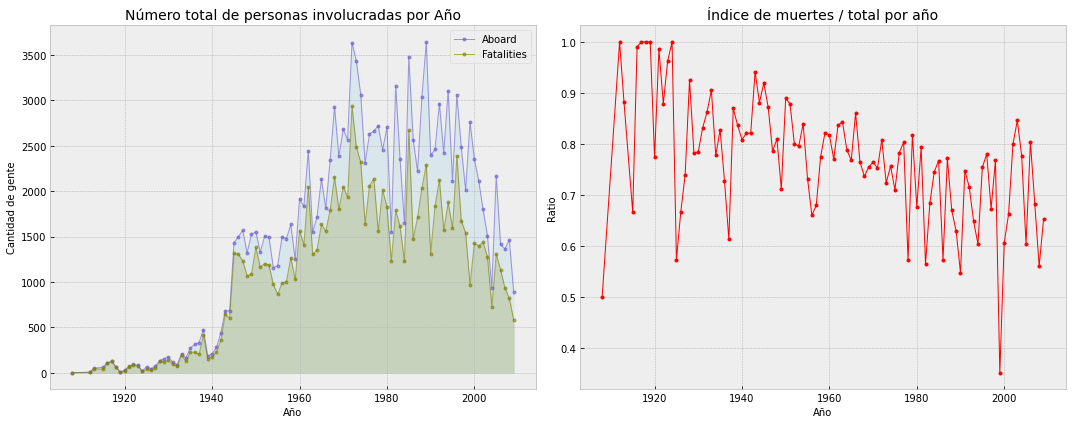

In [11]:
Muertes = Data.groupby(Data.Time.dt.year).sum()
Muertes['Proportion'] = Muertes['Fatalities'] / Muertes['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Muertes.index, 'Aboard', data=Muertes, color="skyblue", alpha=0.2)
plt.plot(Muertes.index, 'Aboard', data=Muertes, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Muertes.index, 'Fatalities', data=Muertes, color="olive", alpha=0.2)
plt.plot(Muertes.index, 'Fatalities', data=Muertes, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad de gente', fontsize=10)
plt.title('Número total de personas involucradas por Año', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Muertes.index, 'Proportion', data=Muertes, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Índice de muertes / total por año', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\mfran\AppData\Local\Temp\ipykernel_7012\3669880502.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "_" (-> marker='_'). The keyword argument will take precedence.
  plt.plot(years,frequency,'_',color="red",linewidth=1,marker='.')


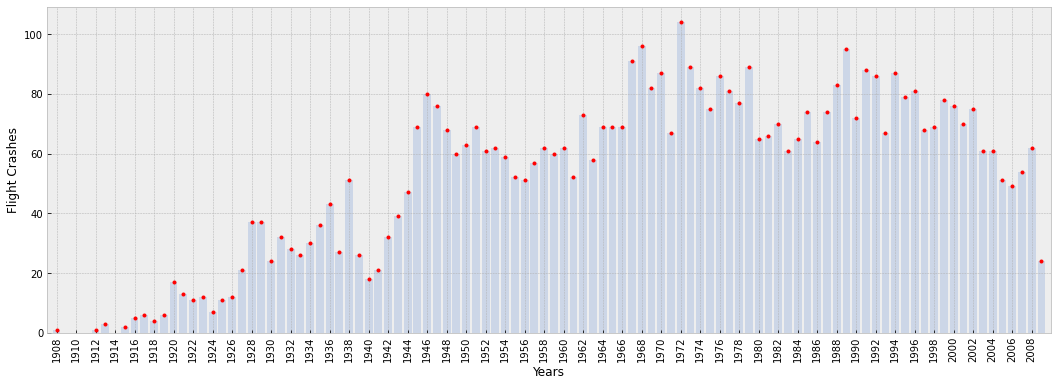

Text(0.5, 1.0, 'Aircraft Crashes Prediction in coming years using Support Vector Regression')

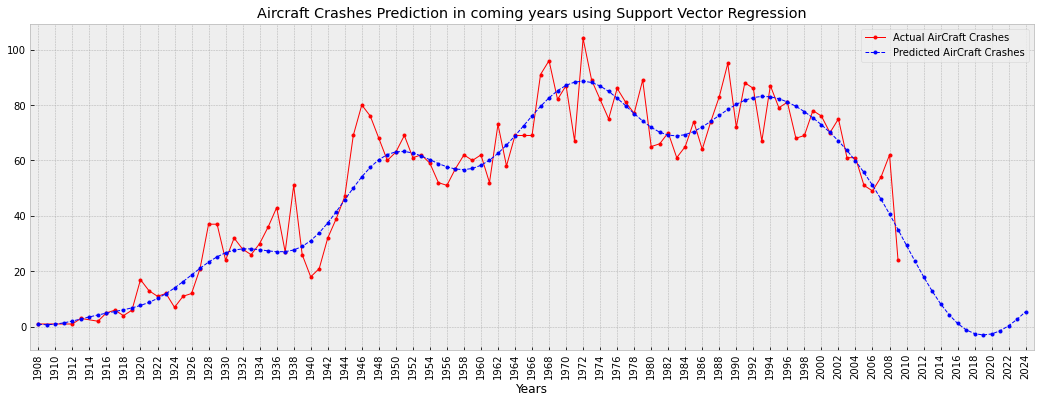

In [12]:
# Transformar información de fecha de cadena a formato de fecha estándar
Data['Date'] = pd.to_datetime(Data['Date']) 

# Extraigo "Año" de los datos de fecha y convertir a matriz np
# Esta es una forma de extraer datos de Pandas Data
planeCrashYear = Data['Date'].apply(lambda x : x.year).values
years, frequency = np.unique(planeCrashYear,return_counts=True)


# Trazo los gráficos por años y frecuencia usando matplotlib y seaborn
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xticks(np.arange(years.min(),years.max(),2))
plt.xlim(years.min()-1, years.max()+1)
plt.xticks(rotation=90)
plt.bar(years,frequency,align="center",alpha=0.2)
plt.plot(years,frequency,'_',color="red",linewidth=1,marker='.')
plt.xlabel('Years')
plt.ylabel('Flight Crashes')
plt.grid(True)
plt.show()

# Predigo los vuelos estrellados en un futuro a partir de 2009 mediante Support Vector Regression
YEARS_OF_PREDICTION = 15

X = [[i] for i in years]
svd_model = SVR(kernel='rbf',C=1e3,gamma= 0.005)
svd_model.fit(X,frequency)
predict = lambda i : svd_model.predict(i)
p_years = np.arange(years.min(),years.max()+YEARS_OF_PREDICTION+1,1).reshape(-1,1)
p_frequency = predict(p_years)
df_flightCrashPrediction = pd.DataFrame({'Years': p_years.flatten(),
                                         'Crashes': p_frequency}).set_index('Years')


## Predigo los accidentes de vuelo de los próximos años utilizando Support Vector Regression de sklearn.
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xticks(np.arange(years.min(),years.max()+YEARS_OF_PREDICTION +2,2))
plt.xlim(years.min()-1, years.max()+YEARS_OF_PREDICTION+1)
plt.xticks(rotation=90)
plt.plot(years,frequency,color="red",linewidth=1,marker='.')
plt.plot(p_years,p_frequency,'--',color="blue",linewidth=1,marker='.')
plt.xlabel('Years')
plt.legend(['Actual AirCraft Crashes','Predicted AirCraft Crashes',])
plt.title("Aircraft Crashes Prediction in coming years using Support Vector Regression")

<AxesSubplot:title={'center':'Recuento de accidentes por día de la semana'}>

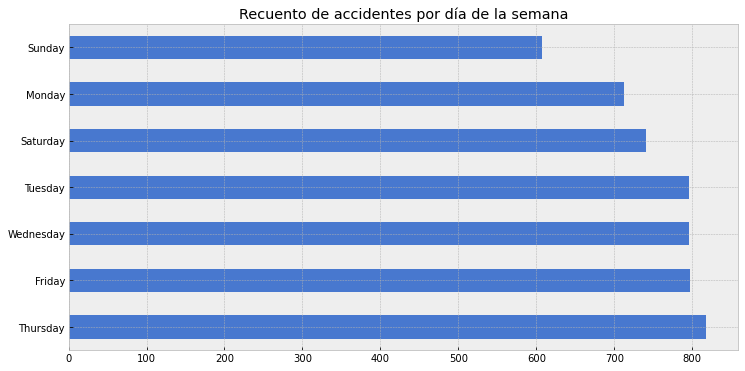

In [13]:
## Defino Día de la semana y saco el día que hay más accidentes. Es Miercoles.

Data['Dia de la semana'] = pd.DatetimeIndex(Data['Date']).day_name()
Data['Dia de la semana'].value_counts().plot(kind='barh', figsize=[12, 6], title='Recuento de accidentes por día de la semana')

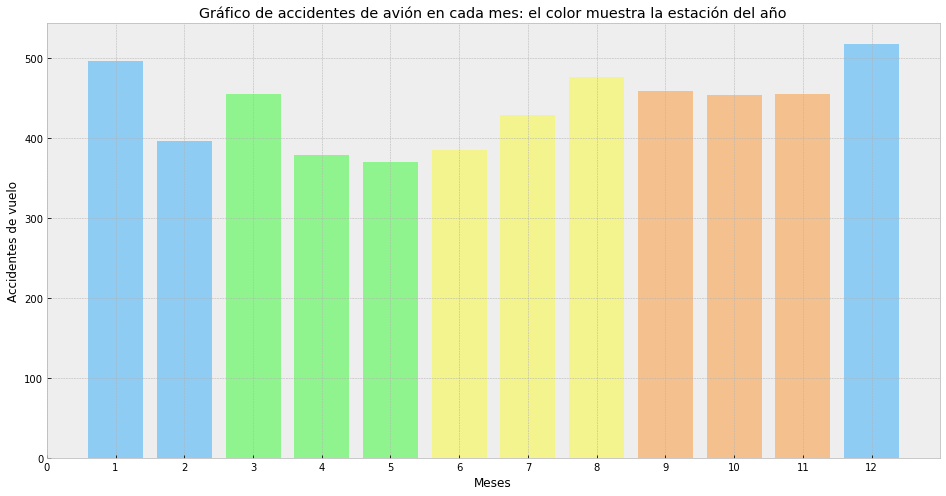

In [14]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

# Extraigo "Mes" de la fecha; esta vez, creo un marco de datos separado y ordeno por mes.

planeCrashMonth = Data.Date.map(lambda x : x.month).value_counts().to_frame().sort_index()

# Trazo los gráficos por años y frecuencia

plt.figure(figsize=(16, 8))
color = ['#009BFF','#009BFF','#04FF00','#04FF00','#04FF00','#FFFE00','#FFFE00','#FFFE00','#FF7F00','#FF7F00','#FF7F00']
plt.bar(planeCrashMonth.index,planeCrashMonth.Date,align="center",alpha=0.4,color=color)

plt.xticks(np.arange(13))

plt.title('Gráfico de accidentes de avión en cada mes: el color muestra la estación del año')
plt.xlabel('Meses')
plt.ylabel('Accidentes de vuelo')
plt.grid(True)

In [15]:
## Vuelvo a hacer un poco de cleaning definiendo Month.

Data['Month'] = pd.DatetimeIndex(Data['Date']).month

Estacion
Invierno     1409
Otoño        1367
Primavera    1203
Verano       1289
Name: Estacion, dtype: int64

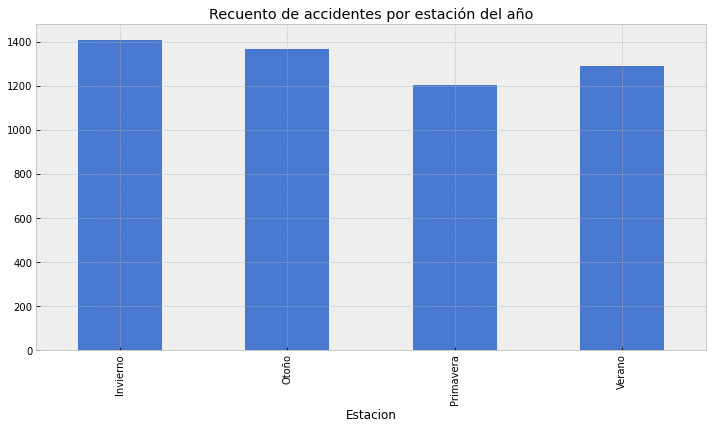

In [16]:


def get_season(month):
    if month >= 3 and month <= 5:
        return 'Primavera'
    elif month >= 6 and month <= 8:
        return 'Verano'
    elif month >= 9 and month <= 11:
        return 'Otoño'
    else:
        return 'Invierno'

Data['Estacion'] = Data['Month'].apply(get_season)

crashed_by_season = Data['Estacion'].groupby(Data['Estacion']).count()
crashed_by_season.plot(kind='bar', figsize=[12, 6], title='Recuento de accidentes por estación del año')
crashed_by_season

<AxesSubplot:title={'center':'Countries with more than 1000 total fatalities'}, xlabel='Cleaned Country'>

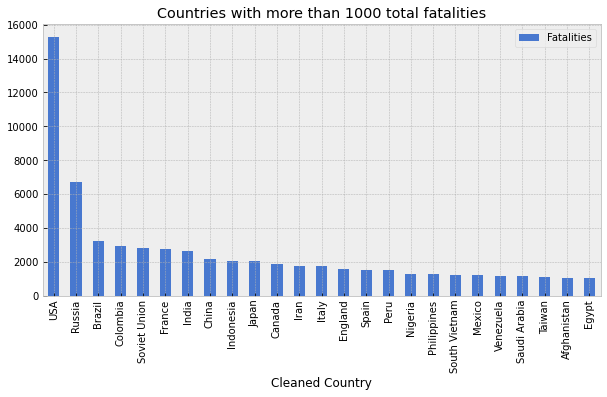

In [17]:
s = Data['Location'].str[0:].str.split(',', expand=True)
Data['Country'] = s[3].fillna(s[2]).fillna(s[1]).str.strip()

## Saco todos los estados de USA para poder asignarles un país
usNames = ['Virginia','New Jersey','Ohio','Pennsylvania', 'Maryland', 'Indiana', 'Iowa',
          'Illinois','Wyoming', 'Minnisota', 'Wisconsin', 'Nevada', 'NY','California',
          'WY','New York','Oregon', 'Idaho', 'Connecticut','Nebraska', 'Minnesota', 'Kansas',
          'Texas', 'Tennessee', 'West Virginia', 'New Mexico', 'Washington', 'Massachusetts',
          'Utah', 'Ilinois','Florida', 'Michigan', 'Arkansas','Colorado', 'Georgia''Missouri',
          'Montana', 'Mississippi','Jersey', 'Cailifornia', 'Oklahoma','North Carolina',
          'Kentucky','Delaware','D.C.','Arazona','Arizona','South Dekota','New Hampshire','Hawaii',
          'Washingon','Massachusett','Washington DC','Tennesee','Deleware','Louisiana',
          'Massachutes', 'Louisana', 'New York (Idlewild)','Oklohoma','North Dakota','Rhode Island',
          'Maine','Wisconson','Calilfornia','Virginia','Virginia.','CA','Vermont',
          'HI','AK','IN','GA','Coloado','Airzona','Alabama', 'United States', 'Alaksa', 'Alaska', 'Alakska'
          ]

rusNames = ['Russian'] #Rusia
sovNames = ['USSR'] #Unión Soviética

clnames = []
for country in Data['Country'].values:
    if country in rusNames:
         clnames.append('Russia')
    elif country in usNames:
        clnames.append('USA')
    elif country in sovNames:
        clnames.append('Soviet Union')
    else:
        clnames.append(country)
        
Data['Cleaned Country'] = clnames        
fatal_countries = Data[['Fatalities','Cleaned Country']].groupby(
    ['Cleaned Country']).sum().sort_values('Fatalities', ascending=False)
fatal_countries.reset_index(inplace = True)
fatal_countries[fatal_countries['Fatalities']>1000].plot(
    x='Cleaned Country', y='Fatalities', kind='bar', figsize=[10, 5], title='Countries with more than 1000 total fatalities')

<AxesSubplot:>

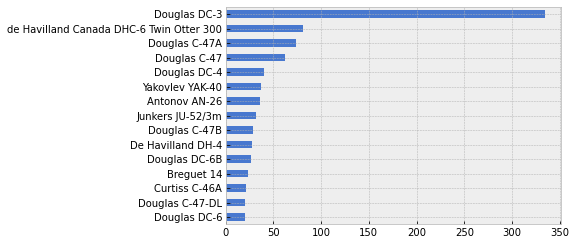

In [18]:
# Cuál es el avión que se ha estrellado más veces?

Data['Type'].value_counts().head(15).sort_values().plot.barh()

In [19]:
# Definimos Año y definimos lo que es una decada.

Data['Año'] = pd.DatetimeIndex(Data['Date']).year
Data['Decada'] = (Data['Año']) // 10 * 10

<AxesSubplot:>

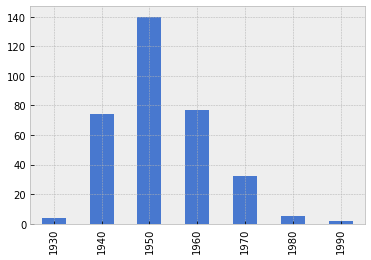

In [21]:
# El tipo de avión más accidentado de todos los tiempos es el Douglas DC-3. Su pico de accidentes fue en 1950. 
# Ahora casi no falla, probablemente debido a la disminución del uso desde 1990.

Data[Data['Type'] == 'Douglas DC-3']['Decada'].value_counts().sort_index().plot.bar()

In [22]:
## Creamos columna Survived

Data['Survived'] = Data['Aboard'] - Data['Fatalities']
Data["Tasa de supervivencia"] = 100 * (Data["Survived"]) / Data["Aboard"]


<AxesSubplot:title={'center':'Grupos de tasa de supervivencia en % del total de accidentes'}, xlabel='Tasa de supervivencia', ylabel='% de accidentes totales'>

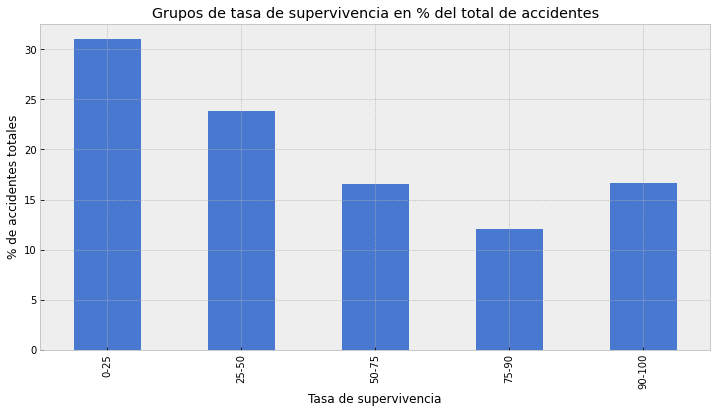

In [23]:
## Tasa de supervivencia:

bins=[0,25,50,75,90,100]
labels=['0-25', '25-50', '50-75', '75-90', '90-100']

group_survival_rate=Data.groupby(pd.cut(Data["Tasa de supervivencia"], bins=bins, labels=labels)).size()
group_survival_rate_per_of_total=100*group_survival_rate/group_survival_rate.sum()

group_survival_rate_per_of_total.plot(
    kind='bar', figsize=[12, 6], title='Grupos de tasa de supervivencia en % del total de accidentes', ylabel='% de accidentes totales')